In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model_TBF as model
import solvers_TBF as solvers

In [2]:
mesh, BCs = geometry.getTruss()
coordinates, connectivity = mesh["coordinates"], mesh["connectivity"]

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(100, 0, 0.1, 20, 5)
modelA.section.setProperties(1)
modelA.setBoundaryConditions(BCs)

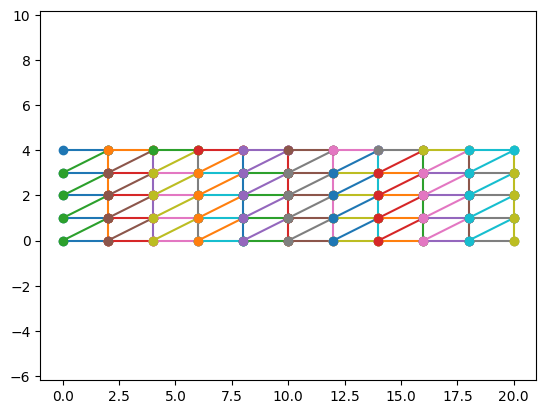

In [3]:
modelA.plotUndeformed()

In [4]:
solver = solvers.Dynamic()
solver.setTolerance(1e-3)
solver.setMaxIterations(20)
solver.setSolutionAttempts(5)
solver.setControlElement(0)

In [5]:
# Select excitation case study
variation = 0

if variation == 1:
    modelA.damping.setRayleighParameters(alpha=0.05, beta=0.05)
    solver.setConstraint("Constant")
    nsteps, dt, Amp = 1000, 0.2, 2
    t = np.arange(0, nsteps * dt, dt)
elif variation == 2:
    solver.setConstraint("IncreasingLoad")

    # Task 3.1: Apply a linearly increasing load of magnitude 3
    #           replicating a quasi static pushover analysis
    nsteps, dt = 100, 1.0
    Amp = 3/nsteps/dt
    t = np.arange(0, nsteps * dt, dt)

    # Task 3.2: Use damping to further reduce dynamic response
    # Compute Rayleigh coefficients
    Zetas, Omegas = [0.005,0.005], [0.4703, 1.9118]
    alphaR, betaR = model.Damping.getRayleighCoeffs(Zetas, Omegas)
    modelA.damping.setRayleighParameters(alpha=alphaR, beta=betaR)
else:
    # Task 4.1 : Apply a harmonic excitation inside the solvers class
    solver.setConstraint("Harmonic")

    # Task 4.2: Set the Rayleigh damping parameters such that
    # the damping ratio for the first two frequencies of the
    # system is 3%
    Zetas, Omegas = [0.03, 0.03], [0.4703, 1.9118]
    alphaR, betaR = model.Damping.getRayleighCoeffs(Zetas, Omegas)
    modelA.damping.setRayleighParameters(alpha=alphaR, beta=betaR)

    # Task 4.3: Set the time step such that the response in the frequency
    # range of the excitation can be accurately captured
    nsteps, dt, Amp = 500, 0.1, np.array([[5, 0.9],["amplitude factor","frequency content"]])

    t = np.arange(0, nsteps * dt, dt)

# Excitation definition
u, se = solver.solve(modelA, t, dt, Amp)


TypeError: can't multiply sequence by non-int of type 'float'

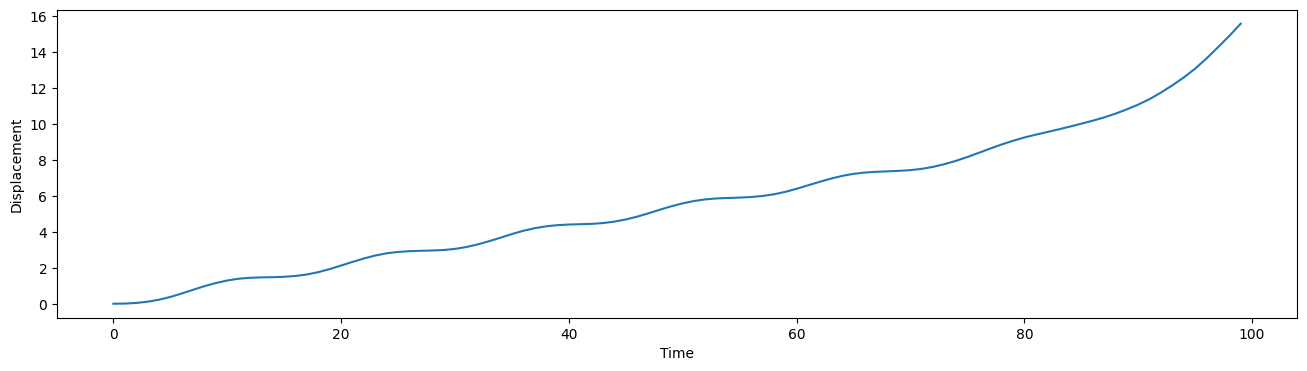

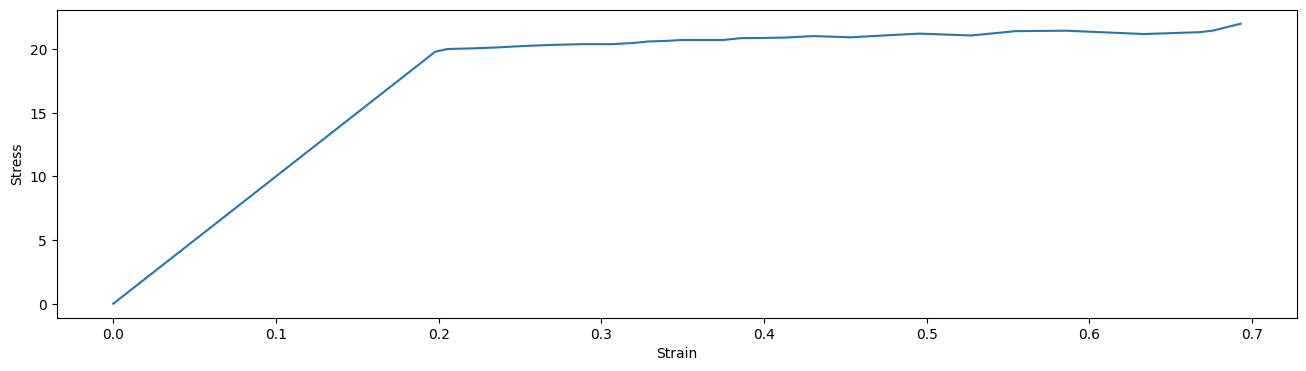

In [ ]:
#Plot displacement response
plt.figure(figsize=(16, 4))
plt.plot(u[109, :])
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.show()

#Plot stress-strain time history
plt.figure(figsize=(16, 4))
plt.plot(se[1, :], se[0, :])
plt.xlabel("Strain")
plt.ylabel("Stress")
plt.show()

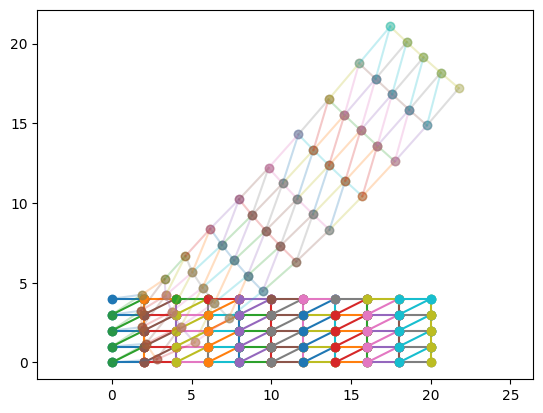

In [ ]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=1, alpha=0.25)